In [159]:
import pandas as pd
import numpy as np

# Data Ingestion

In [275]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

# Rename columns to use with dot notation
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [293]:
df.describe(include='all')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,612.000000,577.0,609.0,612.0,612.0,612.000000,612.000000,612.000000,612.000000,612.000000,...,612,612.0,612.0,612,612,612.0,612.000000,612.000000,612.000000,612.000000
unique,NaN,26.0,12.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2,4.0,5.0,2,2,6.0,NaN,NaN,NaN,NaN
top,NaN,23.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,1.0,0.0,True,False,0.0,NaN,NaN,NaN,NaN
freq,NaN,136.0,77.0,132.0,170.0,NaN,NaN,NaN,NaN,NaN,...,580,494.0,230.0,330,563,368.0,NaN,NaN,NaN,NaN
mean,18.299020,NaN,NaN,NaN,NaN,221.375817,29.230392,12.227124,36.140523,265.433912,...,NaN,NaN,NaN,NaN,NaN,NaN,78.374183,171.843137,26.535948,4.379085
std,10.982077,NaN,NaN,NaN,NaN,65.674638,14.595277,4.178785,6.434857,32.356520,...,NaN,NaN,NaN,NaN,NaN,NaN,12.569760,5.653228,4.210930,3.456546
min,1.000000,NaN,NaN,NaN,NaN,118.000000,5.000000,1.000000,27.000000,205.917000,...,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,163.000000,19.000000,0.000000
25%,10.000000,NaN,NaN,NaN,NaN,179.000000,16.000000,9.000000,30.000000,241.476000,...,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,169.000000,24.000000,2.000000
50%,20.000000,NaN,NaN,NaN,NaN,225.000000,26.000000,12.000000,37.000000,264.249000,...,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,170.000000,25.000000,3.000000
75%,28.000000,NaN,NaN,NaN,NaN,260.000000,49.000000,16.000000,40.000000,284.031000,...,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,172.000000,31.000000,8.000000


In [291]:
# After analysis, columns reason_for_absence and month_of_absence shows min. values as 0 which is to be treated as NaN
# So, we import the dataset again treating the same

df.reason_for_absence.loc[df.reason_for_absence == 0] = np.NaN
df.month_of_absence.loc[df.month_of_absence == 0] = np.NaN

/Users/Mayank/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Data Preprocessing

In [292]:
cat_columns = ['reason_for_absence','month_of_absence','day_of_the_week','seasons','education','son','pet']
for column in cat_columns:
    df[column] = df[column].astype('category')

bool_columns = ['disciplinary_failure','social_drinker','social_smoker']
for column in bool_columns:
    df[column] = df[column].astype('bool')

# Check datatype for each column in Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 21 columns):
id                                 612 non-null int64
reason_for_absence                 577 non-null category
month_of_absence                   609 non-null category
day_of_the_week                    612 non-null category
seasons                            612 non-null category
transportation_expense             612 non-null int64
distance_from_residence_to_work    612 non-null int64
service_time                       612 non-null int64
age                                612 non-null int64
work_load_average/day              612 non-null float64
hit_target                         612 non-null int64
disciplinary_failure               612 non-null bool
education                          612 non-null category
son                                612 non-null category
social_drinker                     612 non-null bool
social_smoker                      612 non-null bool
pet           

In [294]:
# The reason_for_absence and month_of_absence columns shows 43 and 3 NaN values
df.isna().sum()

id                                  0
reason_for_absence                 35
month_of_absence                    3
day_of_the_week                     0
seasons                             0
transportation_expense              0
distance_from_residence_to_work     0
service_time                        0
age                                 0
work_load_average/day               0
hit_target                          0
disciplinary_failure                0
education                           0
son                                 0
social_drinker                      0
social_smoker                       0
pet                                 0
weight                              0
height                              0
body_mass_index                     0
absenteeism_time_in_hours           0
dtype: int64

In [276]:
# Check the shape of dataframe
df.shape

(740, 21)

In [277]:
# Drop duplicates from dataset
df = df.drop_duplicates()

#After dropping duplicates, check the shape again
df.shape

(706, 21)

In [249]:
# For all rows where reason_for_absence is NaN, the absenteeism_time_in_hours is 0, hence we can drop these rows
df[df.reason_for_absence.isna()][['reason_for_absence','absenteeism_time_in_hours']].head()

,reason_for_absence,absenteeism_time_in_hours


In [250]:
# After dropping the rows where reason_for_absence is NaN, 
# we are still left with 1 row where abseteeism_time_in_hours is 0
# We would impute this with mean value of column in dataframe

df = df.dropna(subset=['reason_for_absence']).reset_index(drop=True)
df[df.absenteeism_time_in_hours == 0]

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
118,34,27.0,1.0,2,2,118,10,10,37,308.593,...,False,1,0,False,False,0,83,172,28,0


In [251]:
# Impute above row with mean value for reason_for_absence = 27
df.loc[df.absenteeism_time_in_hours == 0,'absenteeism_time_in_hours'] = \
    df[df['reason_for_absence']==27].absenteeism_time_in_hours.mean()

## Outlier Analysis

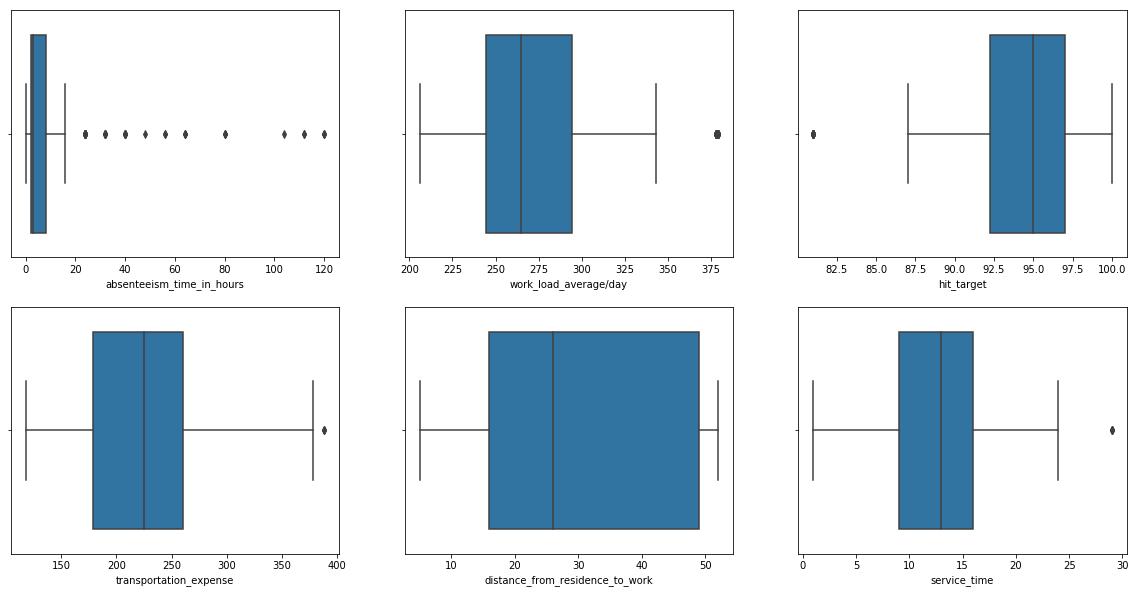

In [280]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[0][0])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[0][1])
sns.boxplot(x='hit_target', data=df, ax=axes[0][2])
sns.boxplot(x='transportation_expense', data=df, ax=axes[1][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[1][1])
sns.boxplot(x='service_time', data=df, ax=axes[1][2])

In [288]:
# From the above plot, we can see that there are many outliers which can be removed from the dataset:
# 1) absenteeism_time_in_hours => 24
# 2) work_load_average/day > 350
# 3) hit_target < 85
# 4) transportation_expense > 380
# 5) service_time > 25

df = df.drop(index = df[df.absenteeism_time_in_hours >= 24].index).reset_index(drop=True)
df = df.drop(index = df[df['work_load_average/day'] > 350].index).reset_index(drop=True)
df = df.drop(index = df[df.hit_target < 85].index).reset_index(drop=True)
df = df.drop(index = df[df.transportation_expense > 380].index).reset_index(drop=True)
df = df.drop(index = df[df.service_time > 25].index).reset_index(drop=True)

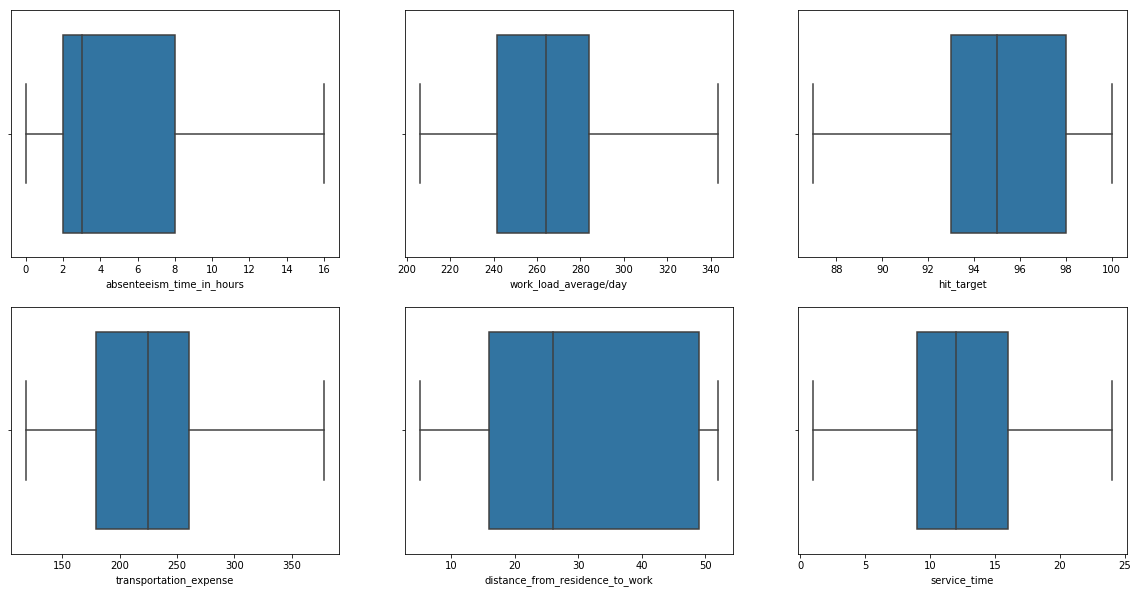

In [289]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[0][0])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[0][1])
sns.boxplot(x='hit_target', data=df, ax=axes[0][2])
sns.boxplot(x='transportation_expense', data=df, ax=axes[1][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[1][1])
sns.boxplot(x='service_time', data=df, ax=axes[1][2])

In [295]:
# Below, we see that there are some months which overlap in 2 seasons
# We will merge months into seasons where the count is more
# e.g., Month 6 is in Season 1 (count = 16) and Season 3 (count = 33). 
# Hence, it should be merged in Season 3 (new_count = 49)
# Similarly for other months too
df.groupby(by=['seasons','month_of_absence']).id.count()

seasons  month_of_absence
1        6.0                 14
         7.0                 60
         8.0                 53
         9.0                 18
2        1.0                 42
         2.0                 59
         3.0                 52
         12.0                 8
3        3.0                 25
         4.0                 44
         5.0                 43
         6.0                 21
4        9.0                 14
         10.0                65
         11.0                57
         12.0                34
Name: id, dtype: int64

In [296]:
df.loc[(df.month_of_absence==6) & (df.seasons==1),'seasons'] = 3
df.loc[(df.month_of_absence==12) & (df.seasons==2),'seasons'] = 4
df.loc[(df.month_of_absence==9) & (df.seasons==4),'seasons'] = 1
df.loc[(df.month_of_absence==3) & (df.seasons==3),'seasons'] = 2

In [297]:
# After making the above changes, the seasons and months are arranged properly
df.groupby(by=['seasons','month_of_absence']).id.count()

seasons  month_of_absence
1        7.0                 60
         8.0                 53
         9.0                 32
2        1.0                 42
         2.0                 59
         3.0                 77
3        4.0                 44
         5.0                 43
         6.0                 35
4        10.0                65
         11.0                57
         12.0                42
Name: id, dtype: int64

# Data Exploration

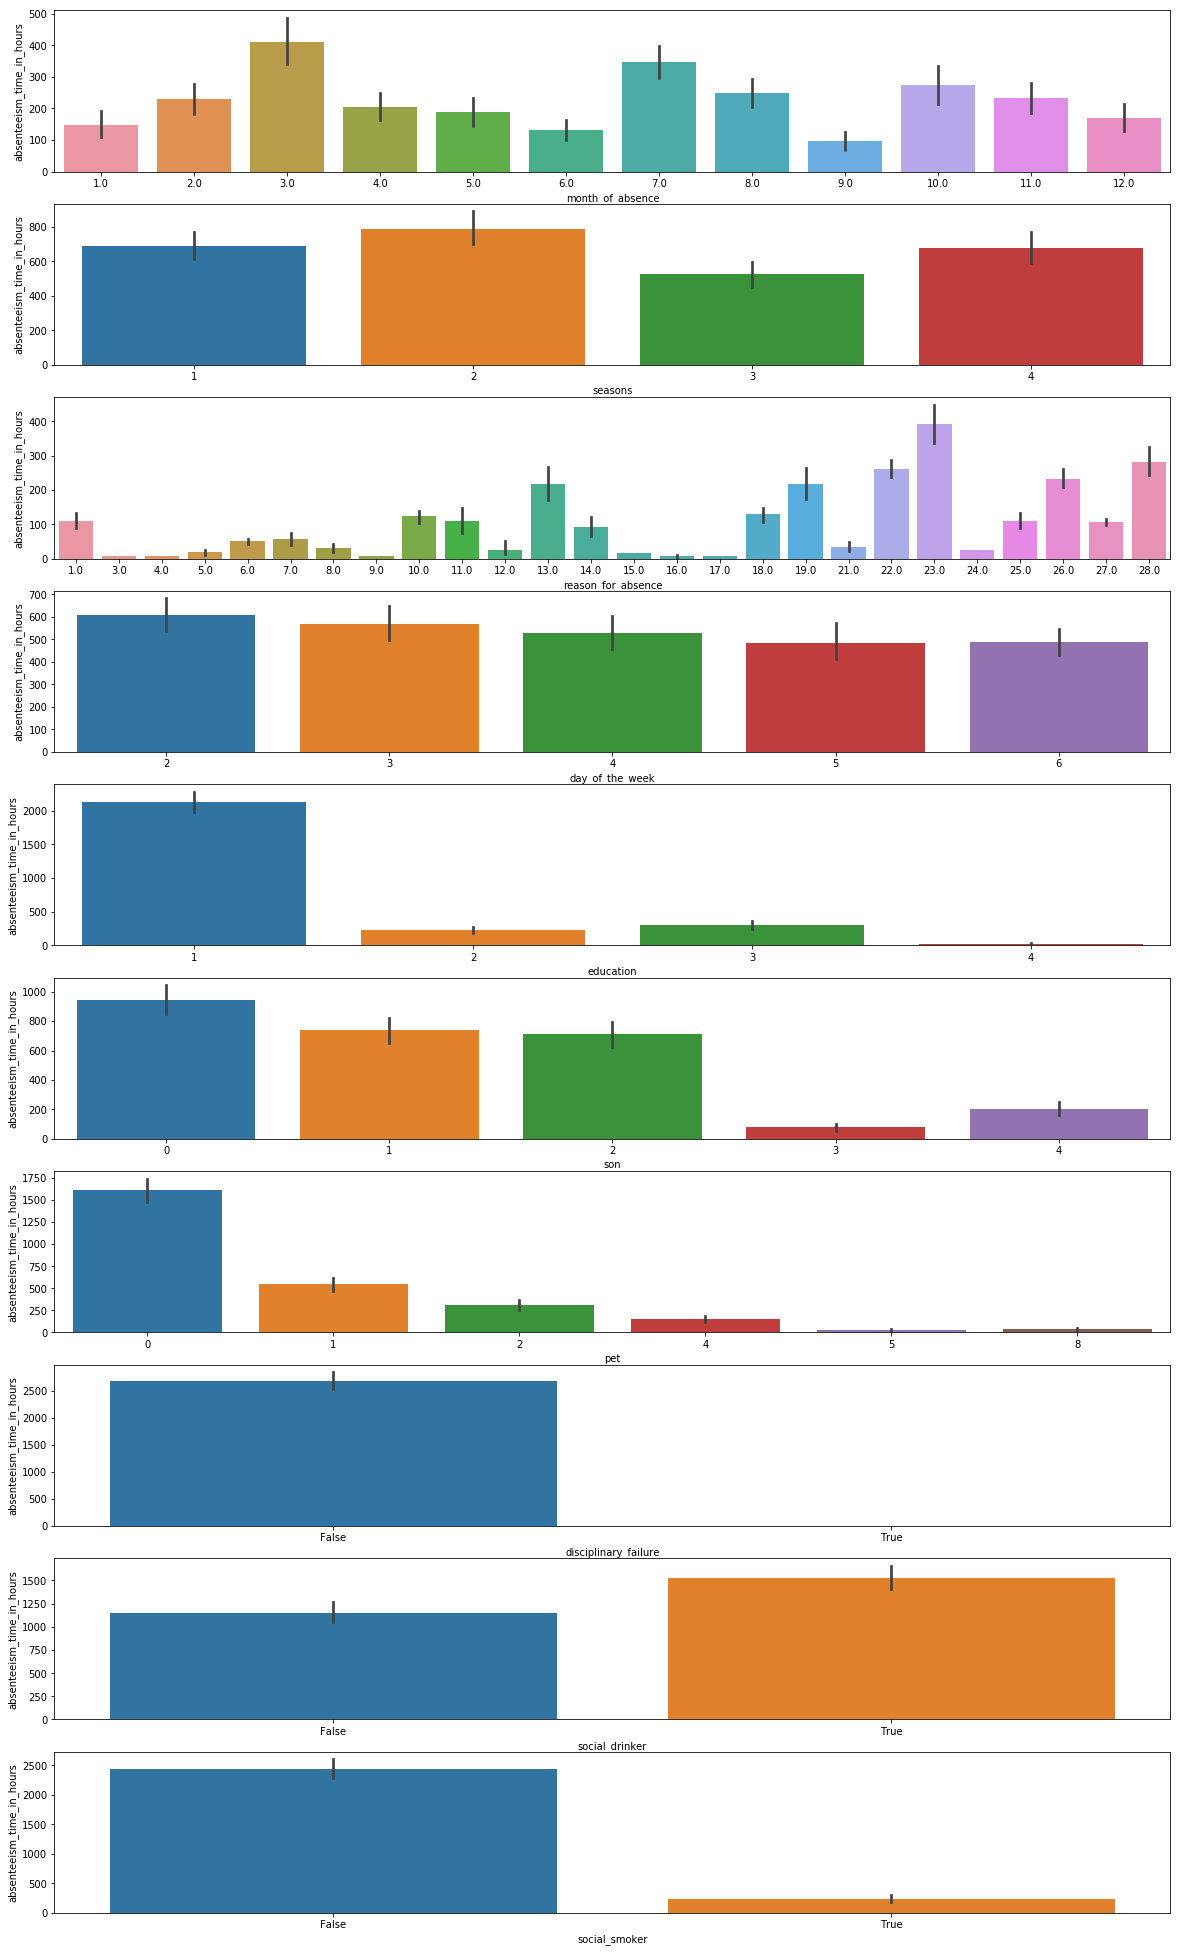

In [317]:
fig, axes = plt.subplots(10, 1)
fig.set_figheight(35)
fig.set_figwidth(20)

# For categorical columns
sns.barplot(x='month_of_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[0])
sns.barplot(x='seasons',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[1])
sns.barplot(x='reason_for_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[2])
sns.barplot(x='day_of_the_week',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[3])
sns.barplot(x='education',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[4])
sns.barplot(x='son',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[5])
sns.barplot(x='pet',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[6])

# For boolean columns
sns.barplot(x='disciplinary_failure',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[7])
sns.barplot(x='social_drinker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[8])
sns.barplot(x='social_smoker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[9])

### From the above bar plot, the following can be inferred
- <i>Highest absence is in months of March, July and October
- <i>Most absence are due to reason codes 23, 28 and 22

In [320]:
df[df.reason_for_absence==26].day_of_the_week.value_counts()

2    10
6     8
4     6
3     6
5     2
Name: day_of_the_week, dtype: int64

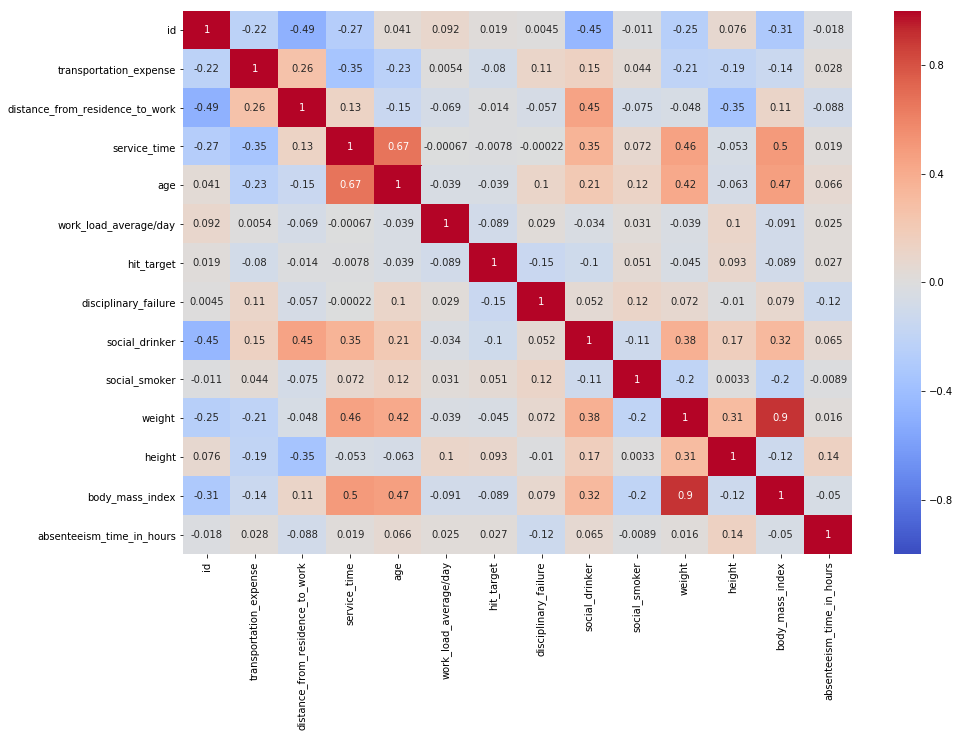

In [207]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)
plt.show()

### From the above heatmap, the following relationships are prominent

- transportation_expense is positively correlated with distance_from_residence_to_work
- service_time is positively correlated with age
- transportation_expense is negatively correlated with age and service_time
- body_mass_index is derived from height and weight, so we can drop height and weight from the prediction model

### Feature Scaling using StandardScaler() function

In [208]:
scaled_columns = ['transportation_expense','distance_from_residence_to_work','work_load_average/day','hit_target','body_mass_index']

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df.head()

/Users/Mayank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,0.633333,0.659574,13,33,0.194471,...,False,1,2,True,False,1,90,172,0.578947,4
1,36,0,7,3,1,0.000000,0.170213,18,50,0.194471,...,True,1,1,True,False,0,98,178,0.631579,0
2,3,23,7,4,1,0.225926,0.978723,18,38,0.194471,...,False,1,0,True,False,0,89,170,0.631579,2
3,7,7,7,5,1,0.596296,0.000000,14,39,0.194471,...,False,1,2,True,True,0,68,168,0.263158,4
4,11,23,7,5,1,0.633333,0.659574,13,33,0.194471,...,False,1,2,True,False,1,90,172,0.578947,2


In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#cols = list(df.columns)

cols = ['reason_for_absence','month_of_absence','day_of_the_week','seasons','transportation_expense', \
'distance_from_residence_to_work','service_time','age','work_load_average/day','hit_target', \
'disciplinary_failure','education','son','social_drinker','social_smoker','pet','body_mass_index', \
'absenteeism_time_in_hours']

X = df.loc[:,cols[:-1]]
Y = df.loc[:,cols[-1:]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [210]:
from sklearn.metrics import mean_squared_error
Y_pred = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(Y_pred, Y_test))
print(RMSE)

10.917136675103976


In [211]:
coeff_df = pd.DataFrame(lr.coef_[0], cols[0:-1], columns=['Coefficient'])
coeff_df

,Coefficient
reason_for_absence,-0.529018
month_of_absence,0.202087
day_of_the_week,-1.252025
seasons,-0.343146
transportation_expense,-0.201370
distance_from_residence_to_work,-2.840979
service_time,0.087175
age,0.193598
work_load_average/day,-1.321829
hit_target,4.785495


In [94]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [220]:
from sklearn.feature_selection import RFE

rfe = RFE(lr, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False  True False False  True False False  True  True  True  True
  True  True  True False  True]
Feature Ranking: [2 5 1 6 3 1 8 4 1 1 1 1 1 1 1 7 1]


/Users/Mayank/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [221]:
for item in zip(X.columns,fit.support_):
    print(item)

('reason_for_absence', False)
('month_of_absence', False)
('day_of_the_week', True)
('seasons', False)
('transportation_expense', False)
('distance_from_residence_to_work', True)
('service_time', False)
('age', False)
('work_load_average/day', True)
('hit_target', True)
('disciplinary_failure', True)
('education', True)
('son', True)
('social_drinker', True)
('social_smoker', True)
('pet', False)
('body_mass_index', True)


In [256]:
df[df['work_load_average/day']>350].hit_target

187    92
188    92
189    92
190    92
191    92
192    92
193    92
194    92
195    92
196    92
197    92
198    92
199    94
200    94
201    94
202    94
203    94
204    94
205    94
206    94
207    94
208    94
209    94
210    94
211    94
212    94
213    94
214    94
Name: hit_target, dtype: int64

In [231]:
df.shape

(740, 21)

In [278]:
df.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

In [322]:
df[df.month_of_absence==3].reason_for_absence.value_counts()

27.0    12
28.0    10
13.0     9
23.0     8
22.0     7
19.0     5
14.0     5
25.0     5
11.0     3
26.0     1
6.0      1
7.0      1
8.0      1
10.0     1
21.0     1
17.0     1
18.0     1
1.0      1
12.0     0
24.0     0
15.0     0
9.0      0
16.0     0
5.0      0
4.0      0
3.0      0
Name: reason_for_absence, dtype: int64